In [1]:
import os 
import numpy as np
from util import plot_figure
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
color_list = sns.color_palette()

In [2]:
def subplot_homo(me, fig_idx):

    plot_csgd = plot_figure(algo_name=f'csgd', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_csgd, = plot_csgd.plot_lines(ax[fig_idx], c['csgd'], label='CSGD', legend=False, plot_star=True)

    plot_dsgd_homo = plot_figure(algo_name=f'dsgd-homo-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_dsgd, = plot_dsgd_homo.plot_lines(ax[fig_idx], c['dsgd-homo'], label='Homo-DSGD', legend=False, plot_star=True)

    plot_gt_homo = plot_figure(algo_name=f'gt-homo-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_gt, = plot_gt_homo.plot_lines(ax[fig_idx], c['gt-homo'], label='Homo-GT', legend=False, plot_star=True)

    plot_edas_homo = plot_figure(algo_name=f'edas-homo-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_edas, = plot_edas_homo.plot_lines(ax[fig_idx], c['edas-homo'], label='Homo-EDAS', legend=False, plot_star=True)

    plot_ex_homo = plot_figure(algo_name=f'ex-homo-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_ex, = plot_ex_homo.plot_lines(ax[fig_idx], c['ex-homo'], label='Homo-ExDi', legend=False, plot_star=True)

    plot_dsgd_er_homo = plot_figure(algo_name=f'dsgd-homo-ER', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    line_dsgd_er, = plot_dsgd_er_homo.plot_lines(ax[fig_idx], c['dsgd-er-homo'], label='Homo-DSGD-ER', legend=False, plot_star=True)

    ax[fig_idx].grid(True)
    ax[fig_idx].set_xlim([1e0, 1e5])
    if me == 'mse':
        ax[fig_idx].set_ylabel(r"$\|\bar{\theta}^{t}-\theta^{\star}\|^2$", fontsize = 18)
    elif me == 'wmse':
        ax[fig_idx].set_ylabel(r"$\max_{i\in[n]}\|{\theta}^{t}_{i}-\theta^{\star}\|^2$", fontsize = 18)
    ax[fig_idx].set_title('Homo. Data', fontsize = 18)

    return line_csgd, line_dsgd, line_edas, line_ex, line_gt, line_dsgd_er

In [3]:
def subplot_hete(me, fig_idx):

    plot_csgd = plot_figure(algo_name=f'csgd', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_csgd.plot_lines(ax[fig_idx], c['csgd'], label='CSGD', legend=False, plot_star=True)

    plot_dsgd_hete = plot_figure(algo_name=f'dsgd-hete-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_dsgd_hete.plot_lines(ax[fig_idx], c['dsgd-hete'], label='hete-DSGD', legend=False, plot_star=True)

    plot_gt_hete = plot_figure(algo_name=f'gt-hete-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_gt_hete.plot_lines(ax[fig_idx], c['gt-hete'], label='hete-GT', legend=False, plot_star=True)

    plot_edas_hete = plot_figure(algo_name=f'edas-hete-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_edas_hete.plot_lines(ax[fig_idx], c['edas-hete'], label='hete-EDAS', legend=False, plot_star=True)

    plot_ex_hete = plot_figure(algo_name=f'ex-hete-R', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_ex_hete.plot_lines(ax[fig_idx], c['ex-hete'], label='hete-ExDi', legend=False, plot_star=True)

    plot_dsgd_er_hete = plot_figure(algo_name=f'dsgd-hete-ER', sub_sample=ss, dir = data_dir , log_flag=True, metric=me)
    plot_dsgd_er_hete.plot_lines(ax[fig_idx], c['dsgd-er-hete'], label='hete-DSGD-ER', legend=False, plot_star=True)

    ax[fig_idx].grid(True)
    ax[fig_idx].set_xlim([1e0, 1e5])
    if me == 'mse':
        ax[fig_idx].set_ylabel(r"$\|\bar{\theta}^{t}-\theta^{\star}\|^2$", fontsize = 18)
    elif me == 'wmse':
        ax[fig_idx].set_ylabel(r"$\max_{i\in[n]}\|{\theta}^{t}_{i}-\theta^{\star}\|^2$", fontsize = 18)
    ax[fig_idx].set_title('Hete. Data', fontsize = 18)

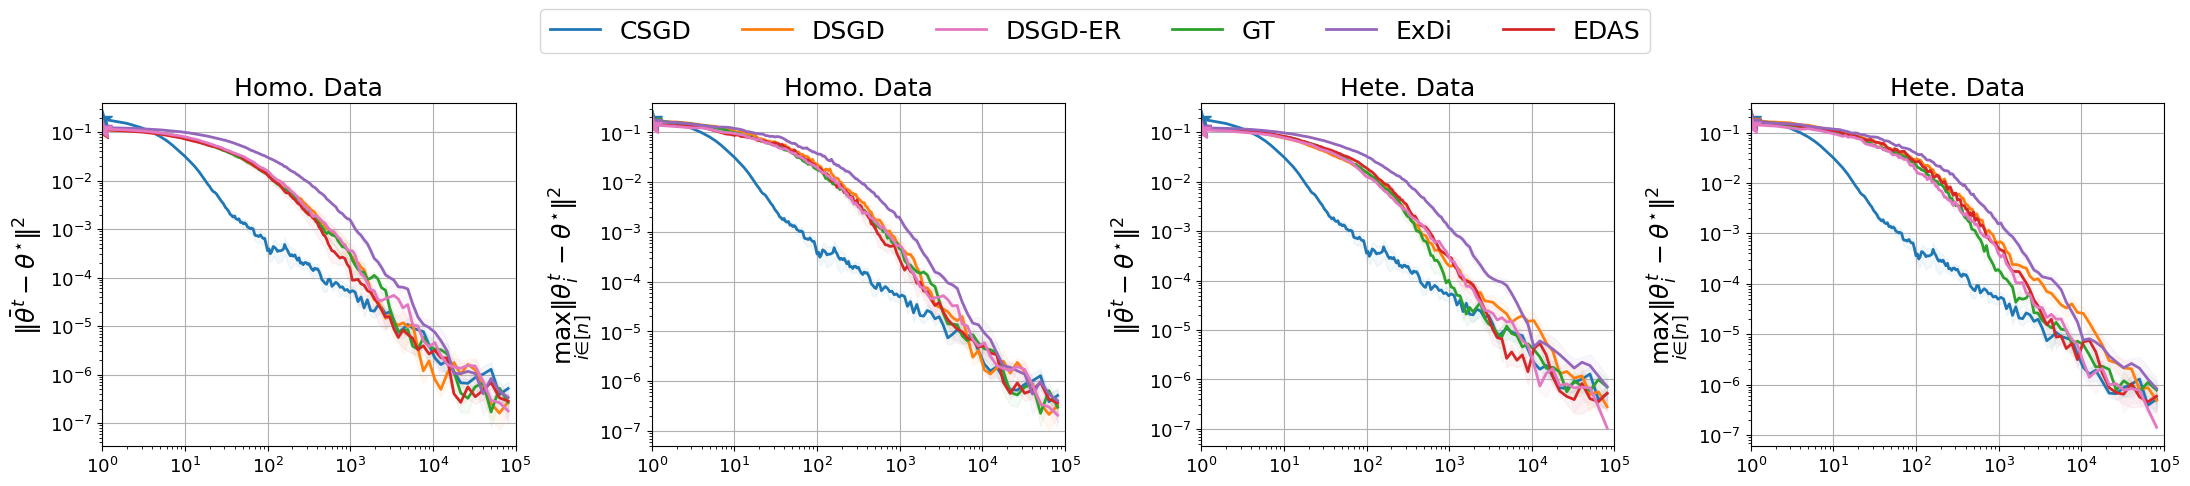

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(5.5*4, 4.3))
data_dir = 'res/'
ss = 5
c = {'csgd': color_list[0], 'dsgd-homo': color_list[1], 'dsgd-hete': color_list[1],
    'gt-homo': color_list[2], 'gt-hete': color_list[2],
    'edas-homo': color_list[3], 'edas-hete': color_list[3],
    'ex-homo':color_list[4], 'ex-hete': color_list[4],
    'dsgd-er-homo': color_list[6], 'dsgd-er-hete': color_list[6],
    }

line_csgd, line_dsgd, line_edas, line_ex, line_gt, line_dsgd_er = subplot_homo('mse', 0)
subplot_homo('wmse', 1)
subplot_hete('mse', 2)
subplot_hete('wmse', 3)

order_labels = {
    'CSGD': line_csgd,
    'DSGD': line_dsgd,
    'DSGD-ER': line_dsgd_er,
    'GT': line_gt,
    'ExDi': line_ex,
    'EDAS': line_edas,
}

fig.legend(order_labels.values(), order_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=11, prop={'size': 18})

# 调整子图之间的间距
plt.tight_layout()
plt.savefig('fig/logistic_simu.pdf', bbox_inches='tight')
plt.show()